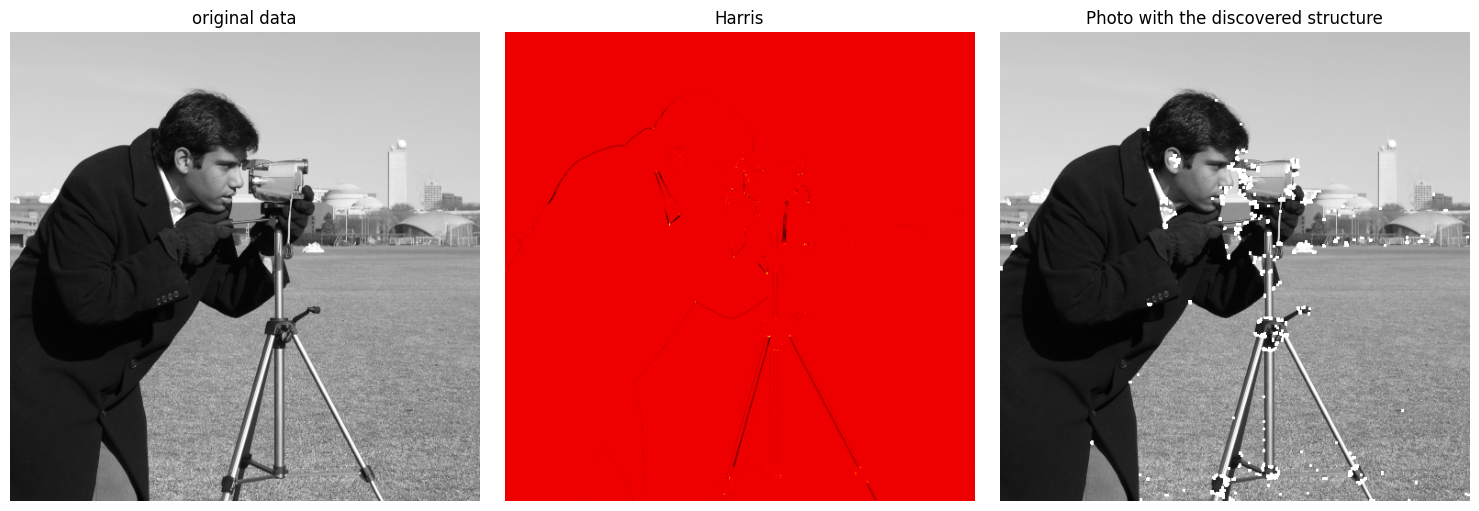

In [2]:
import cv2
import numpy as np
from skimage import data
import matplotlib.pyplot as plt

# 1. نجيب صورة test جاهزة (صورة الكاميرا)
image = data.camera()  # دي صورة أبيض وأسود جاهزة من scikit-image

# 2. نحول الصورة لـ float32 عشان Harris يشتغل
gray = np.float32(image)

# 3. نطبق Harris Corner Detection
harris = cv2.cornerHarris(gray, blockSize=2, ksize=3, k=0.04)

# 4. نحسن النتيجة علشان نعرف نرسم الزوايا
harris_dilated = cv2.dilate(harris, None) # بنعمل dilation علشان نكبر النقاط

# 5. نعمل threshold علشان نحدد الزوايا اللي مهمة
threshold = 0.01 * harris_dilated.max()
corner_image = np.copy(image)
corner_image[harris_dilated > threshold] = 255  # نحط نقاط بيضاء على الزوايا

# 6. نعرض الصور
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.imshow(image, cmap='gray')
plt.title('original data')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(harris, cmap='hot')  #  خريطة حرارية لمناطق الاستجابة للزوايا
plt.title('Harris')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(corner_image, cmap='gray')
plt.title('Photo with the discovered structure')
plt.axis('off')

plt.tight_layout()
plt.show()